# Loading Data

In [14]:
from data_utils import _read_data, _fill_missing_values, _feature_engineering, _one_hot_encoding

df = _read_data()

### Distributions

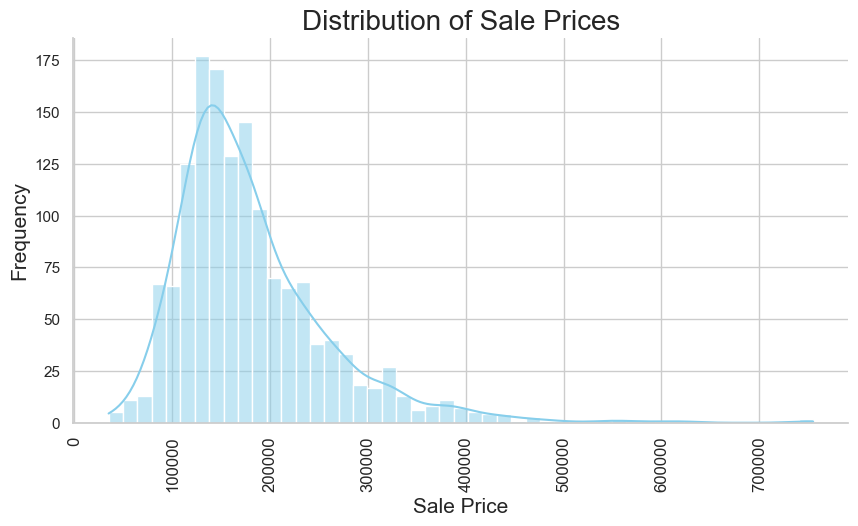

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Prices', fontsize=20)
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()

plt.show()

### Profiling

In [16]:
# from ydata_profiling import ProfileReport
# in case of error: pip install typing_extensions==4.7.1 --upgrade
# profile = ProfileReport(df, title="Profiling Report")

# profile.to_file("reports/data_report.html")

# Data Cleaning and Analysis

# Missing Values

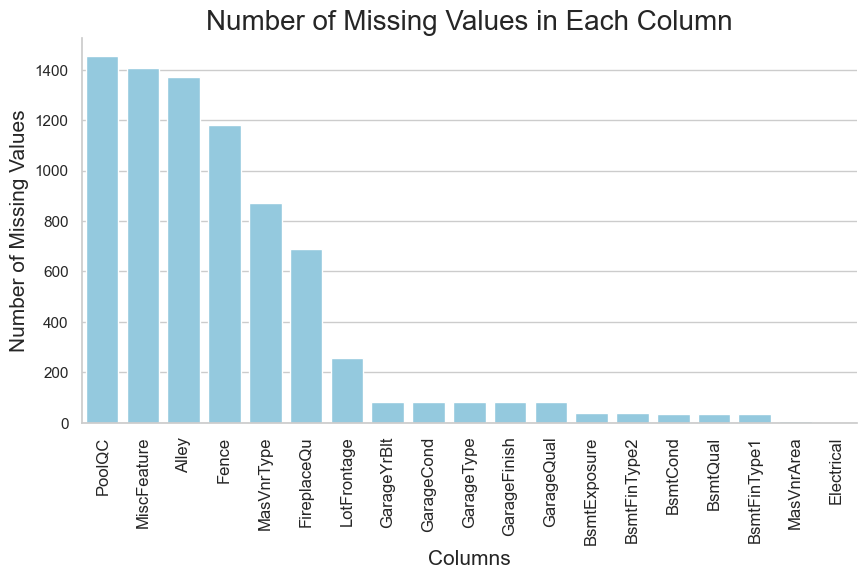

In [17]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]


sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, color='skyblue')

plt.title('Number of Missing Values in Each Column', fontsize=20)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Number of Missing Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
sns.despine()
plt.show()

PoolQC            1453    – code as 'absence'
MiscFeature       1406    – code as 'absence'
Alley             1369    – code as 'absence'
Fence             1179    – code as 'absence'
MasVnrType        872     – code as 'absence'
FireplaceQu       690     – code as 'absence'
GarageType        81      – code as 'absence'
GarageCond        81      – code as 'absence'
GarageFinish      81      – code as 'absence'
GarageQual        81      – code as 'absence'
BsmtFinType2      38      – code as 'absence'
BsmtExposure      38      – code as 'absence'
BsmtQual          37      – code as 'absence'
BsmtCond          37      – code as 'absence'
BsmtFinType1      37      – code as 'absence'

GarageYrBlt       81      – fill with YearBuilt

Electrical        1       – fill in with the most frequently occurring value in the column
MasVnrArea        8       – fill in with the most frequently occurring value in the column
LotFrontage       259     – fill in with the most frequently occurring value in the column

In [ ]:
df = _fill_missing_values(df=df)

# Numerical Features Histograms

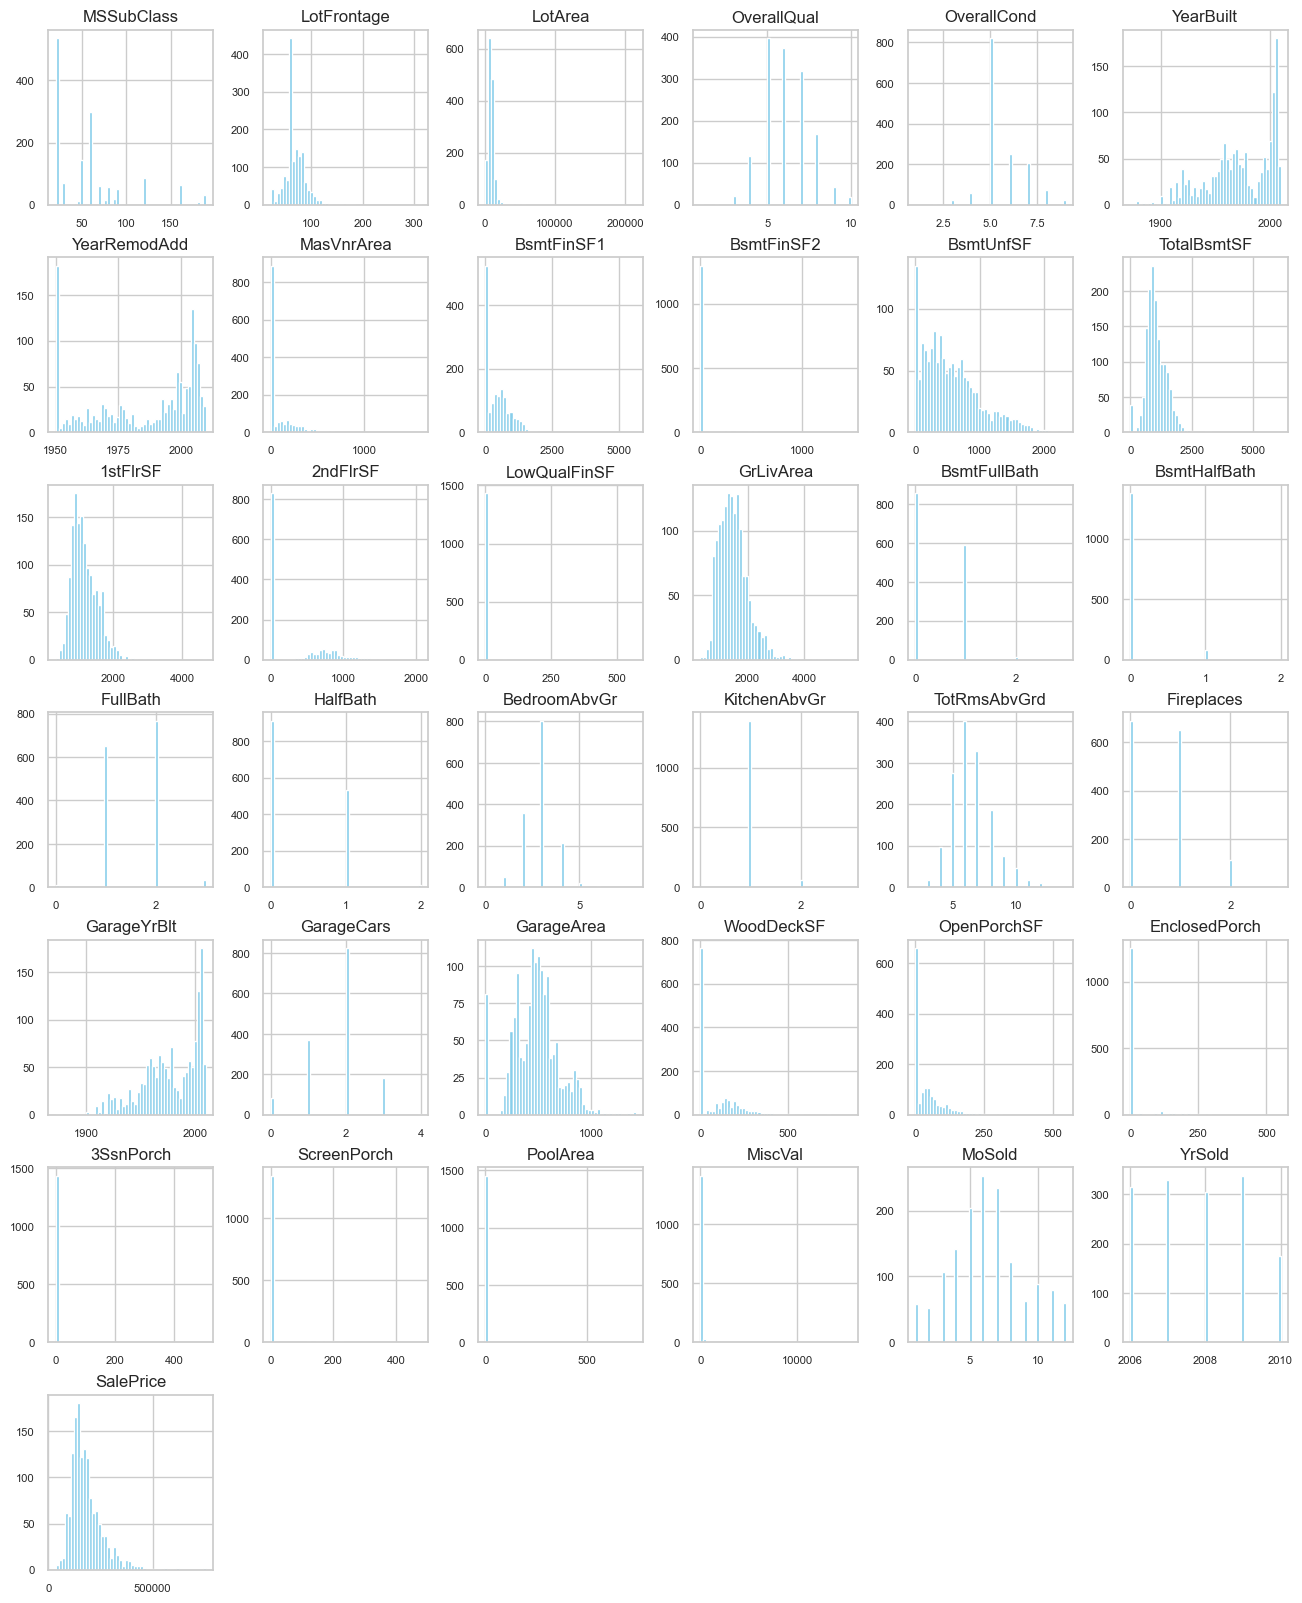

In [19]:
(df
    .select_dtypes(
        include=[np.number])
    .hist(
        figsize=(16, 20), 
        bins=50, 
        xlabelsize=8,
        ylabelsize=8,
        color='skyblue')
);

## Engineered Features 

In [20]:
df = _feature_engineering(df=df)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

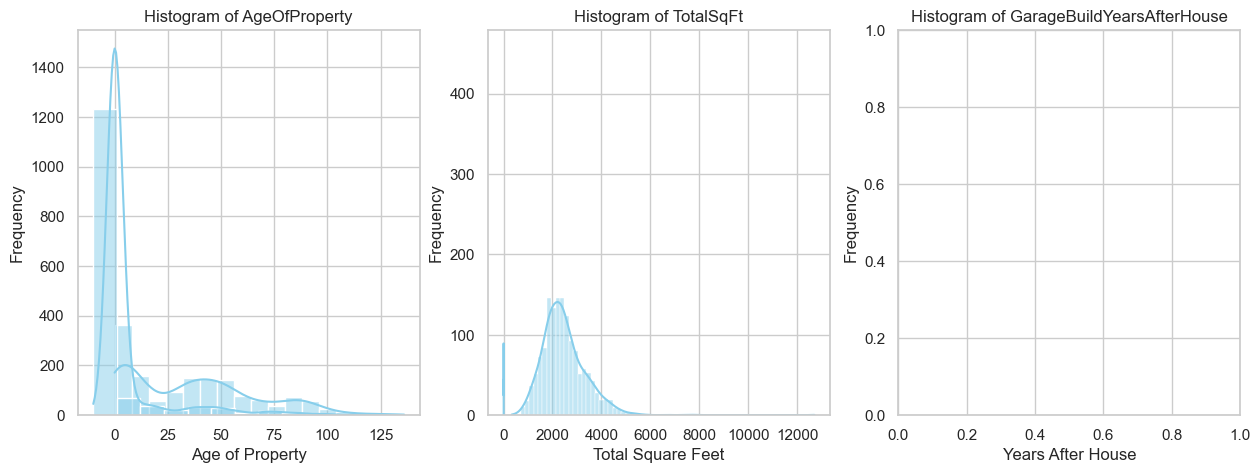

In [21]:
# Setting the style
sns.set(style="whitegrid")

# Creating figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for 'AgeOfProperty'
sns.histplot(df['AgeOfProperty'], ax=axs[0], color='skyblue', kde=True)
axs[0].set_title('Histogram of AgeOfProperty')
axs[0].set_xlabel('Age of Property')
axs[0].set_ylabel('Frequency')

# Histogram for 'TotalSqFt'
sns.histplot(df['TotalSqFt'], ax=axs[1], color='skyblue', kde=True)
axs[1].set_title('Histogram of TotalSqFt')
axs[1].set_xlabel('Total Square Feet')
axs[1].set_ylabel('Frequency')

# Histogram for 'GarageBuildYearsAfterHouse'
sns.histplot(df['GarageBuildYearsAfterHouse'], ax=axs[0], color='skyblue', kde=True)
axs[2].set_title('Histogram of GarageBuildYearsAfterHouse')
axs[2].set_xlabel('Years After House')
axs[2].set_ylabel('Frequency')

# Adding histograms for 'TotalBathrooms'
sns.histplot(df['TotalBathrooms'], ax=axs[1], color='skyblue', kde=True)
axs[0, 0].set_title('Histogram of TotalBathrooms')
axs[0, 0].set_xlabel('Total Bathrooms')
axs[0, 0].set_ylabel('Frequency')

# Adding histograms for 'TotalPorchSF'
sns.histplot(df['TotalPorchSF'], ax=axs[1], color='skyblue', kde=True)
axs[0, 1].set_title('Histogram of TotalPorchSF')
axs[0, 1].set_xlabel('Total Porch Sq Ft')
axs[0, 1].set_ylabel('Frequency')

# Displaying the plots
plt.tight_layout()
plt.show()

## OneHot Encoded Features

In [ ]:
df = _one_hot_encoding(df=df)

In [ ]:
df.head(3)

# Loading Data

## Data split - Train & Test

In [ ]:
from data_utils import load_raw_data, load_training_data
df = load_raw_data(feature_engineering=True)
x_train, x_test, y_train, y_test = load_training_data(feature_engineering=True)

## Regression Modeling

In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror',
                                 max_depth = 2,
                                 alpha = 0.8298,
                                 random_state=0,
                                 n_estimators=3407,
                                 learning_rate=0.0377,
                                 min_child_weight=0.4565,
                                 subsample=0.9964,
                                 reg_lambda=0.0316,
                                 gamma=0.0009,
                                 colsample_bytree=0.2308,
                                 nthread=-1)

xgb_regressor.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

xgby_pred = xgb_regressor.predict(x_test)

# Calculate R²
r2 = r2_score(y_test, xgby_pred)
print(f'XGBoost - R²: {r2}')

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, xgby_pred)
print(f'XGBoost - MAPE: {mape}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, xgby_pred))
print(f'XGBoost - RMSE: {rmse}')